In [47]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [26]:
data=pd.read_csv('pima_indians_diabetes.csv')
display(data.head())

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
print(data.dtypes)
print(data.columns)

time_pregnant_no                int64
plasma_concentration            int64
diastolic_blood_pressure        int64
triceps_skinfold_thickness      int64
serum_insulin                   int64
bmi                           float64
diabetes_pedigree             float64
age                             int64
class                           int64
dtype: object
Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')


In [28]:
print(data['class'].unique())

[1 0]


In [30]:
print("\nColumns with zero values (potentially missing values):")
print(data.isnull().sum())
print((data==0).sum())


Columns with zero values (potentially missing values):
time_pregnant_no              0
plasma_concentration          0
diastolic_blood_pressure      0
triceps_skinfold_thickness    0
serum_insulin                 0
bmi                           0
diabetes_pedigree             0
age                           0
class                         0
dtype: int64
time_pregnant_no              111
plasma_concentration            5
diastolic_blood_pressure       35
triceps_skinfold_thickness    227
serum_insulin                 374
bmi                            11
diabetes_pedigree               0
age                             0
class                         500
dtype: int64


In [31]:
# Columns where zeroes indicate missing data
columns_with_missing = [
    'plasma_concentration', 
    'diastolic_blood_pressure', 
    'triceps_skinfold_thickness', 
    'serum_insulin', 
    'bmi'
]

# Replace zeros with NaN for imputation
data[columns_with_missing] = data[columns_with_missing].replace(0, np.nan)

# Verify changes
print("\nColumns with missing values replaced:")
print(data.isnull().sum())


Columns with missing values replaced:
time_pregnant_no                0
plasma_concentration            5
diastolic_blood_pressure       35
triceps_skinfold_thickness    227
serum_insulin                 374
bmi                            11
diabetes_pedigree               0
age                             0
class                           0
dtype: int64


In [33]:
imputer=SimpleImputer(strategy='median')
data[columns_with_missing]=imputer.fit_transform(data[columns_with_missing])

In [34]:
X=data.drop('class',axis=1)
y=data['class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 73.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and decision tree classifier.
- Tune up the model (adjust the max depth using grid search
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [50]:
# Load data
df = pd.read_csv("pima_indians_diabetes.csv")

# Assign features to X and target to y
X = df.drop(columns=['class'])
y = df['class']

# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.columns)
    ]
)

In [52]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [53]:
# Tune the model using GridSearchCV to adjust max depth
param_grid = {'classifier__max_depth': range(1, 21)}  # Test depths from 1 to 20
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
           

In [54]:
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': 5}
Best cross-validation score: 0.7504153686396677


In [55]:
# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [63]:
accuracy_explicit = accuracy_score(y_test, y_pred)
print(f"Accuracy (explicit method): {accuracy_explicit:.4f}")

Accuracy (explicit method): 0.7489


In [56]:
# Feature Importance
classifier = best_model.named_steps['classifier']
feature_importances = classifier.feature_importances_

# Feature importance summary
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                      Feature  Importance
1        plasma_concentration    0.530888
5                         bmi    0.190599
7                         age    0.182865
6           diabetes_pedigree    0.054949
2    diastolic_blood_pressure    0.032389
3  triceps_skinfold_thickness    0.008311
0            time_pregnant_no    0.000000
4               serum_insulin    0.000000


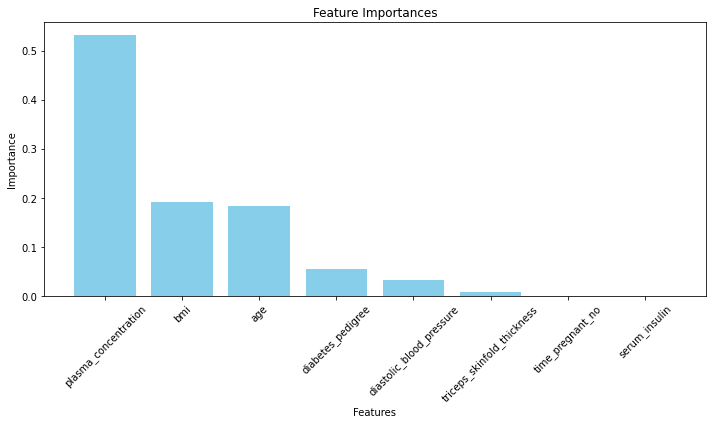

In [57]:
# Bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Drop the least important feature and repeat
least_important_feature = importance_df.iloc[-1]['Feature']
print(f"\nDropping the least important feature: {least_important_feature}")


Dropping the least important feature: serum_insulin


In [59]:
# Repeat the process without the least important feature
X_dropped = X.drop(columns=[least_important_feature])
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.3, random_state=42)

# Repeat preprocessing and model training
model_pipeline_dropped = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X_dropped.columns)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [60]:
# Tune the model using GridSearchCV to adjust max depth
param_grid2 = {'classifier__max_depth': range(1, 21)}  # Test depths from 1 to 20
grid_search2 = GridSearchCV(model_pipeline_dropped, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'bmi', 'diabetes_pedigree', 'age'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1, param_grid=

In [61]:
# Best parameters and score
print("Best parameters:", grid_search2.best_params_)
print("Best cross-validation score:", grid_search2.best_score_)

Best parameters: {'classifier__max_depth': 4}
Best cross-validation score: 0.750484596746279


In [62]:
# Make predictions
best_model2 = grid_search2.best_estimator_
y_pred2 = best_model2.predict(X_test)